# Import Libraries

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline

# Retrieving data from SQL and reading data using Pandas

In [2]:
USER="add user name"
PWD="add password"
HOST="add host"
db_connection_str = f'mysql+pymysql://{USER}:{PWD}@{HOST}/deepanalytics'
db_connection = create_engine(db_connection_str)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=db_connection)

In [4]:
df.to_csv ('credit.csv', index = False)

# Analysis

In [5]:
#Check first 5 rows of data
df.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
#Check column names
df.columns

Index(['MyUnknownColumn', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
#Information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30204 entries, 0 to 30203
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MyUnknownColumn  30204 non-null  object
 1   X1               30204 non-null  object
 2   X2               30204 non-null  object
 3   X3               30204 non-null  object
 4   X4               30204 non-null  object
 5   X5               30204 non-null  object
 6   X6               30204 non-null  object
 7   X7               30204 non-null  object
 8   X8               30204 non-null  object
 9   X9               30204 non-null  object
 10  X10              30204 non-null  object
 11  X11              30204 non-null  object
 12  X12              30204 non-null  object
 13  X13              30204 non-null  object
 14  X14              30204 non-null  object
 15  X15              30204 non-null  object
 16  X16              30204 non-null  object
 17  X17              30204 non-null

In [8]:
#Descriptive statistics about data
df.describe()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30204,30204,30204,30204,30204,30204,30204,30204,30204,30204,...,30204,30204,30204,30204,30204,30204,30204,30204,30204,30204
unique,30002,83,4,6,6,58,13,13,13,13,...,21550,21012,20606,7945,7901,7520,6939,6899,6941,4
top,152,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,2,3397,18217,14107,16088,1619,14828,15830,15863,16566,...,3218,3530,4045,5287,5437,6007,6450,6744,7233,23519


In [9]:
#Re-assign header to make new column names
new_header = df.iloc[0]
proj = df[1:]
proj.columns = new_header
proj.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [10]:
#Reset the rows after re-assignment of header row
proj = proj.reset_index(drop=True)
proj.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [11]:
#Descriptive statistics about data
proj.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30203,30203,30203,30203,30203,30203,30203,30203,30203,30203,...,30203,30203,30203,30203,30203,30203,30203,30203,30203,30203
unique,30002,83,4,6,6,58,13,13,13,13,...,21550,21012,20606,7945,7901,7520,6939,6899,6941,4
top,152,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,2,3397,18217,14107,16088,1619,14828,15830,15863,16566,...,3218,3530,4045,5287,5437,6007,6450,6744,7233,23519


In [12]:
#New datAframe created with dropped rows of duplicate header
credit = proj.drop([201, 202])

In [13]:
#Dataframe with duplicates dropped
credit = credit.drop_duplicates()
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30199,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30200,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30201,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [14]:
#Check first 5 rows of new data 
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [15]:
#Descriptive statistics about data
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,4,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,152,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [16]:
#Check column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

# Pandas profiling
Quick Exploratory Data Analysis (EDA) using Python module

In [17]:
import pandas_profiling

In [18]:
pandas_profiling.ProfileReport(credit, minimal = True)

In [19]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [20]:
#Convert data from object to int for easy use in analysis
cols = ['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
credit[cols] = credit[cols].apply(pd.to_numeric)

In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

# Label Encoding categorical variables
Converting variables - SEX, EDUCATION & DEFAULT PAYMENT NEXT MONTH - to numericals

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Sex

In [24]:
df_lbl_encode = credit.copy()

In [25]:
print(credit)

0         ID  LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0          1      20000  female   university         1   24      2      2   
1          2     120000  female   university         2   26     -1      2   
2          3      90000  female   university         2   34      0      0   
3          4      50000  female   university         1   37      0      0   
4          5      50000    male   university         1   57     -1      0   
...      ...        ...     ...          ...       ...  ...    ...    ...   
30198  29996     220000    male  high school         1   39      0      0   
30199  29997     150000    male  high school         2   43     -1     -1   
30200  29998      30000    male   university         2   37      4      3   
30201  29999      80000    male  high school         1   41      1     -1   
30202  30000      50000    male   university         1   46      0      0   

0      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [26]:
print(df_lbl_encode)

0         ID  LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0          1      20000  female   university         1   24      2      2   
1          2     120000  female   university         2   26     -1      2   
2          3      90000  female   university         2   34      0      0   
3          4      50000  female   university         1   37      0      0   
4          5      50000    male   university         1   57     -1      0   
...      ...        ...     ...          ...       ...  ...    ...    ...   
30198  29996     220000    male  high school         1   39      0      0   
30199  29997     150000    male  high school         2   43     -1     -1   
30200  29998      30000    male   university         2   37      4      3   
30201  29999      80000    male  high school         1   41      1     -1   
30202  30000      50000    male   university         1   46      0      0   

0      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [27]:
#Check for uniques elements in the array
credit['SEX'].unique()

array(['female', 'male'], dtype=object)

In [28]:
le = LabelEncoder()

In [29]:
le.fit_transform(df_lbl_encode['SEX'])

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
df_lbl_encode['SEX'] = le.fit_transform(df_lbl_encode['SEX'])

In [31]:
df_lbl_encode['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [32]:
credit['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

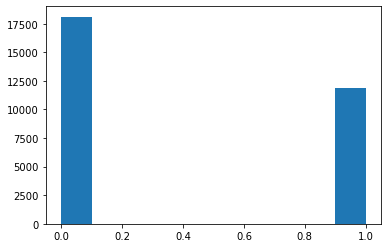

In [33]:
plt.hist(df_lbl_encode['SEX'])
plt.show()

In [34]:
df_lbl_encode.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,0,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,0,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,0,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,1,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Education

In [35]:
credit['EDUCATION'].unique()

array(['university', 'graduate school', 'high school', 'other'],
      dtype=object)

In [36]:
le.fit_transform(df_lbl_encode['EDUCATION'])

array([3, 3, 3, ..., 3, 1, 3])

In [37]:
df_lbl_encode['EDUCATION'] = le.fit_transform(df_lbl_encode['EDUCATION'])

In [38]:
df_lbl_encode['EDUCATION'].value_counts()

3    14030
0    10585
1     4917
2      468
Name: EDUCATION, dtype: int64

In [39]:
credit['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

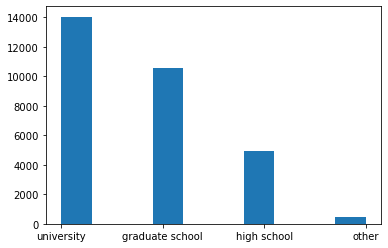

In [40]:
plt.hist(credit['EDUCATION'])
plt.show()

In [41]:
df_lbl_encode.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,3,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,0,3,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,0,3,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,0,3,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,1,3,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Default payment

In [42]:
credit['default payment next month'].unique()

array(['default', 'not default'], dtype=object)

In [43]:
credit['default payment next month'].value_counts()

not default    23364
default         6636
Name: default payment next month, dtype: int64

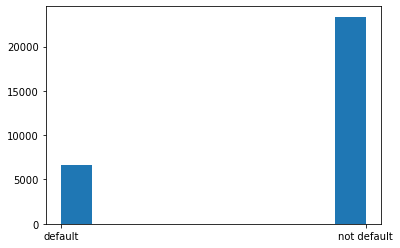

In [44]:
plt.hist(credit['default payment next month'])
plt.show()

In [45]:
le.fit_transform(df_lbl_encode['default payment next month'])

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
df_lbl_encode['default payment next month'] = le.fit_transform(df_lbl_encode['default payment next month'])

In [47]:
df_lbl_encode['default payment next month'].value_counts()

1    23364
0     6636
Name: default payment next month, dtype: int64

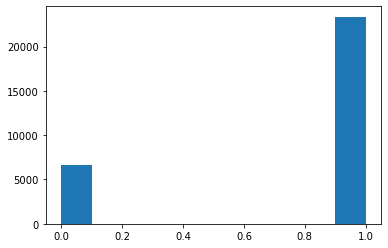

In [48]:
plt.hist(df_lbl_encode['default payment next month'])
plt.show()

In [49]:
#credit = pd.get_dummies(credit)

In [50]:
#Check header
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)


# Variable analysis

# Amount of credit given to customer
Limit Balance

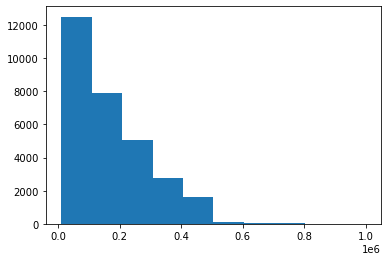

In [51]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

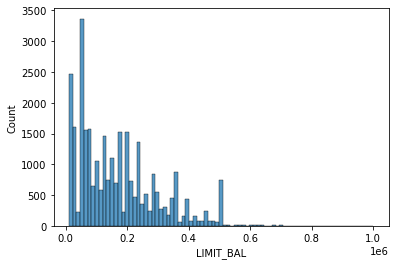

In [52]:
bal_dist = sns.histplot(credit['LIMIT_BAL'])

In [53]:
credit['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

(9999.999, 30000.0]      4081
(30000.0, 50000.0]       3595
(270000.0, 360000.0]     3482
(140000.0, 180000.0]     3331
(70000.0, 100000.0]      3266
(210000.0, 270000.0]     2934
(100000.0, 140000.0]     2792
(180000.0, 210000.0]     2487
(360000.0, 1000000.0]    2476
(50000.0, 70000.0]       1556
Name: LIMIT_BAL, dtype: int64


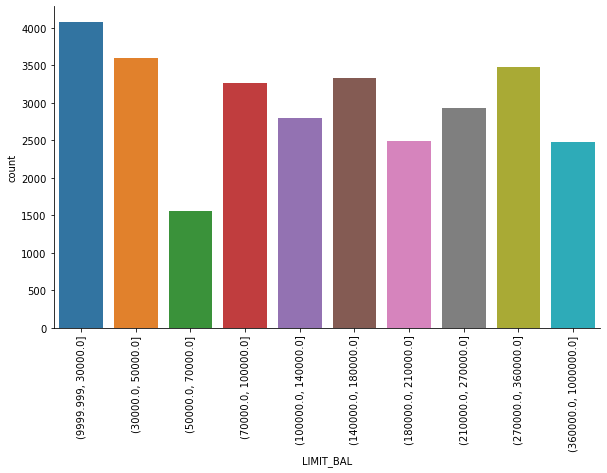

In [54]:
#Discretized limit balance
disc_bal = pd.qcut(credit['LIMIT_BAL'], 10)
print(disc_bal.value_counts())
n = sns.catplot(x = disc_bal, data=credit, kind='count', aspect=1.75, legend=False)
n.set_xticklabels(rotation=90)

# Marriage
1 = married; 2 = single; 3 = divorce; 0=others

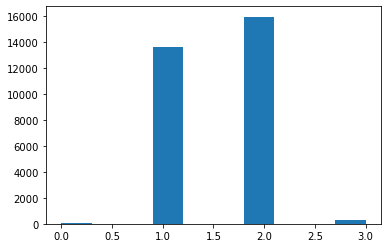

In [55]:
plt.hist(credit['MARRIAGE'])
plt.show()

# Payment history 
2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

As shown in the figures below, customer payment histories appear to be similar except for the month of September

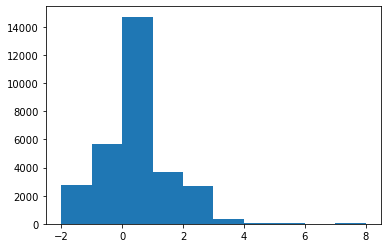

In [56]:
#September
plt.hist(credit['PAY_0'])
plt.show()

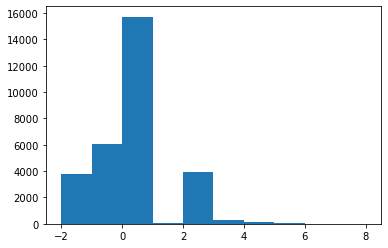

In [57]:
#August
plt.hist(credit['PAY_2'])
plt.show()

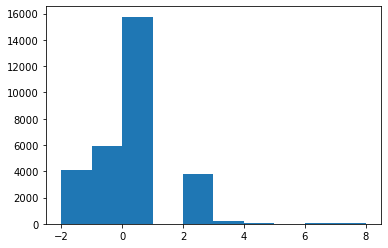

In [58]:
#July
plt.hist(credit['PAY_3'])
plt.show()

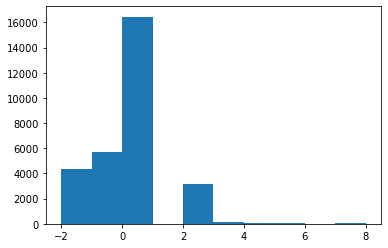

In [59]:
#June
plt.hist(credit['PAY_4'])
plt.show()

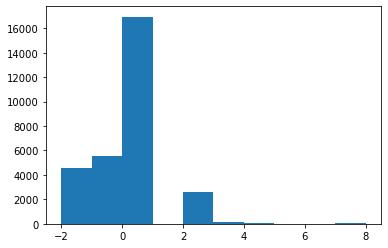

In [60]:
#May
plt.hist(credit['PAY_5'])
plt.show()

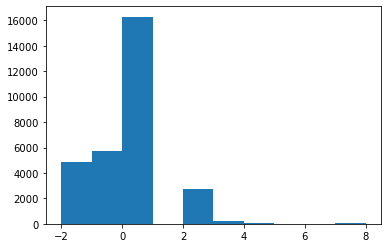

In [61]:
#April
plt.hist(credit['PAY_6'])
plt.show()

# Age

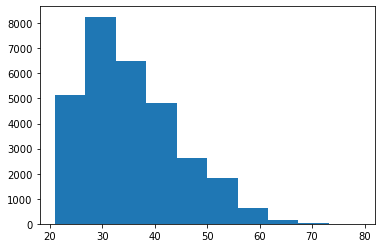

In [62]:
plt.hist(credit['AGE'])
plt.show()

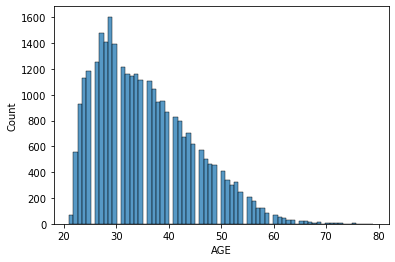

In [63]:
age_dist = sns.histplot(credit['AGE'])

30s    5886
50s    5160
20s    5127
40s    4683
70s    4669
60s    4475
Name: AGE, dtype: int64


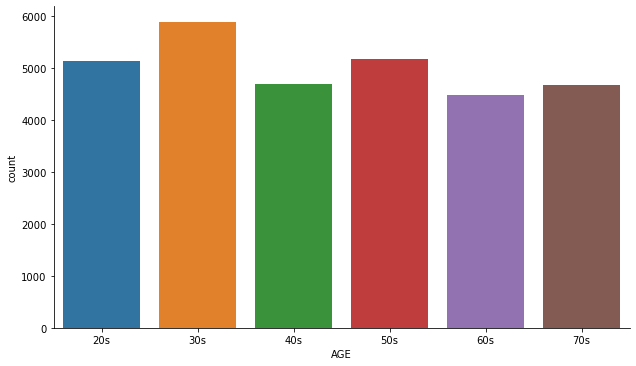

In [64]:
# Customer by Discretized Age
prage = pd.qcut(credit['AGE'], 6, labels = ['20s', '30s', '40s', '50s', '60s', '70s'])
print(prage.value_counts())
g = sns.catplot(x = prage, data=credit, kind='count', aspect=1.75, legend=False)

# Amount of bill
There appears to be no pattern in monthly amount billed (as observed in the figures below) due to variations in spending by customers

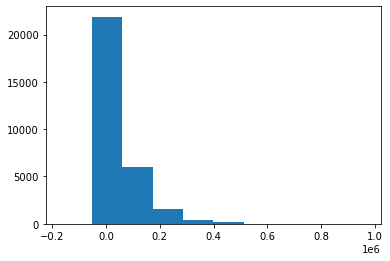

In [65]:
#September
plt.hist(credit['BILL_AMT1'])
plt.show()

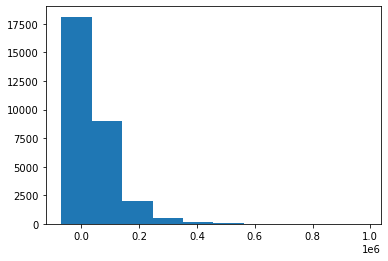

In [66]:
#August
plt.hist(credit['BILL_AMT2'])
plt.show()

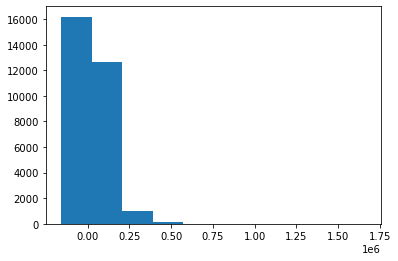

In [67]:
#July
plt.hist(credit['BILL_AMT3'])
plt.show()

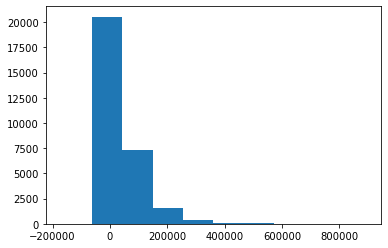

In [68]:
#June
plt.hist(credit['BILL_AMT4'])
plt.show()

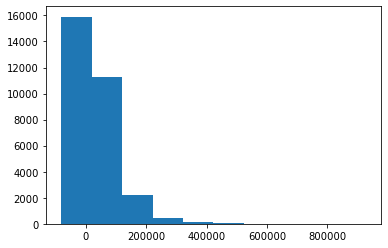

In [69]:
#May
plt.hist(credit['BILL_AMT5'])
plt.show()

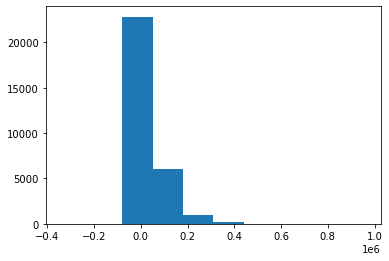

In [70]:
#April
plt.hist(credit['BILL_AMT6'])
plt.show()

# Previous payment amounts


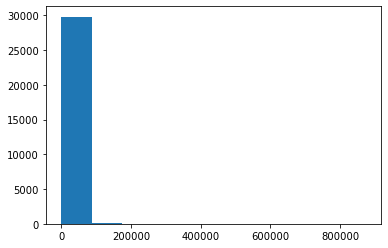

In [71]:
#September
plt.hist(credit['PAY_AMT1'])
plt.show()

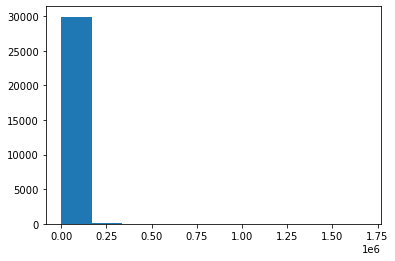

In [72]:
#August
plt.hist(credit['PAY_AMT2'])
plt.show()

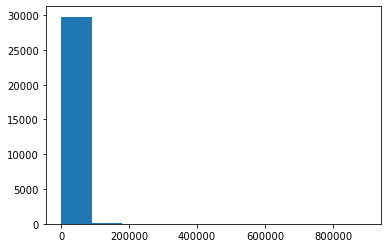

In [73]:
#July
plt.hist(credit['PAY_AMT3'])
plt.show()

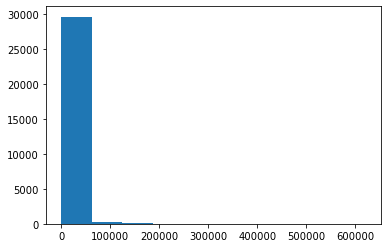

In [74]:
#June
plt.hist(credit['PAY_AMT4'])
plt.show()

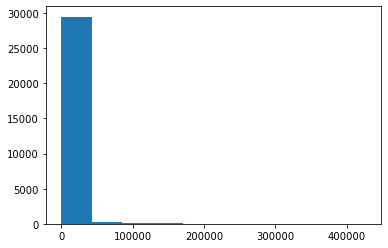

In [75]:
#May
plt.hist(credit['PAY_AMT5'])
plt.show()

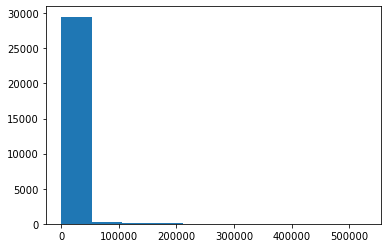

In [76]:
#April
plt.hist(credit['PAY_AMT6'])
plt.show()

In [77]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

# Lineplot 
Single variable

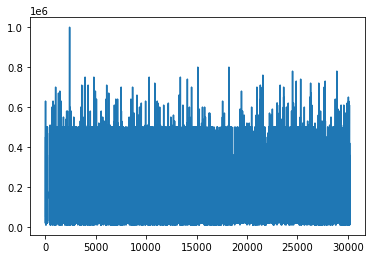

In [78]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

# Scatterplot 
Multivariate

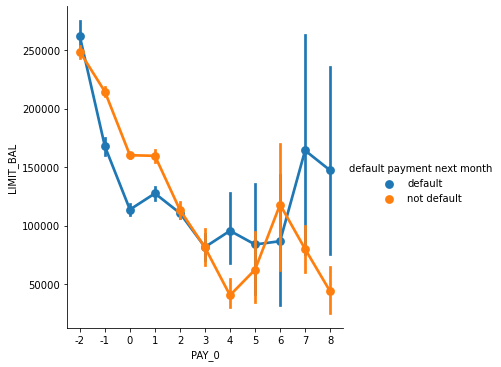

In [79]:
#Limit balance vs Past paymemt to evaluate default
sns.catplot(x= 'PAY_0', y='LIMIT_BAL', hue='default payment next month', kind='point',
           data=credit)

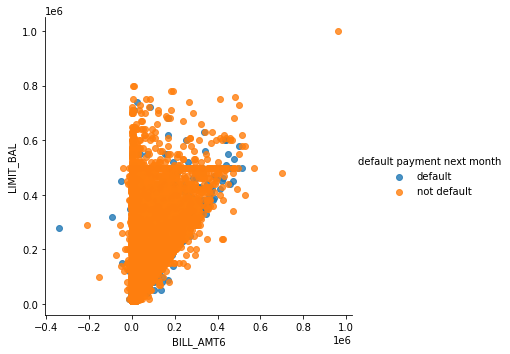

In [80]:
sns.lmplot(x= 'BILL_AMT6', y='LIMIT_BAL', hue='default payment next month',  
           data=credit, fit_reg=False)

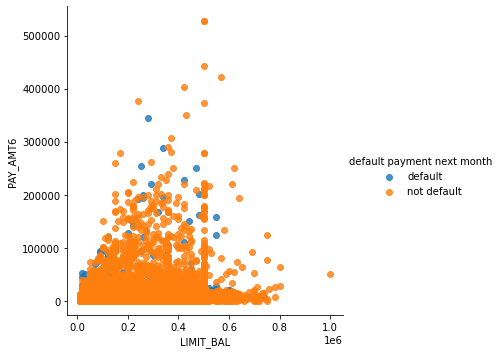

In [81]:
sns.lmplot(x= 'LIMIT_BAL', y='PAY_AMT6', hue='default payment next month', 
           data=credit, fit_reg=False)

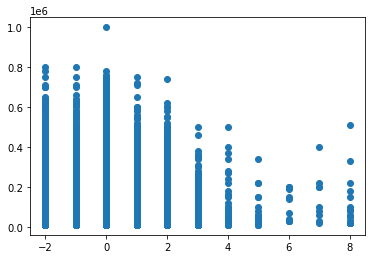

In [82]:
x = credit['PAY_0']
y = credit['LIMIT_BAL']

plt.scatter(x,y)
plt.show()

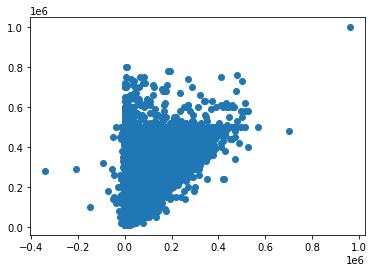

In [83]:
x1 = credit['BILL_AMT6']
y1 = credit['LIMIT_BAL']

plt.scatter(x1,y1)
plt.show()

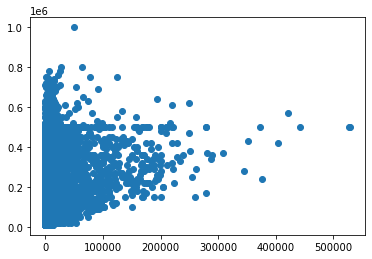

In [84]:
x = credit['PAY_AMT6']
y = credit['LIMIT_BAL']

plt.scatter(x,y)
plt.show()

# Boxplot 

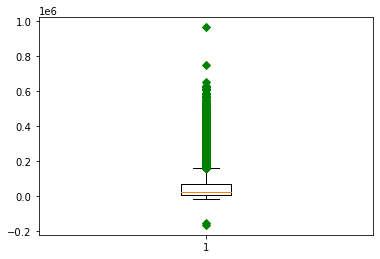

In [85]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

# Correlation

In [86]:
corrMat = df_lbl_encode.corr()
print(corrMat)

0                                 ID  LIMIT_BAL       SEX  EDUCATION  \
0                                                                      
ID                          1.000000   0.026179 -0.018497   0.014235   
LIMIT_BAL                   0.026179   1.000000 -0.024755  -0.196273   
SEX                        -0.018497  -0.024755  1.000000  -0.027139   
EDUCATION                   0.014235  -0.196273 -0.027139   1.000000   
MARRIAGE                   -0.029079  -0.108139  0.031389  -0.087956   
AGE                         0.018678   0.144713  0.090874  -0.020678   
PAY_0                      -0.030575  -0.271214  0.057643   0.119623   
PAY_2                      -0.011215  -0.296382  0.070771   0.144983   
PAY_3                      -0.018494  -0.286123  0.066096   0.136838   
PAY_4                      -0.002735  -0.267460  0.060173   0.130569   
PAY_5                      -0.022199  -0.249411  0.055064   0.120814   
PAY_6                      -0.020270  -0.235195  0.044008   0.11

<AxesSubplot:xlabel='0', ylabel='0'>

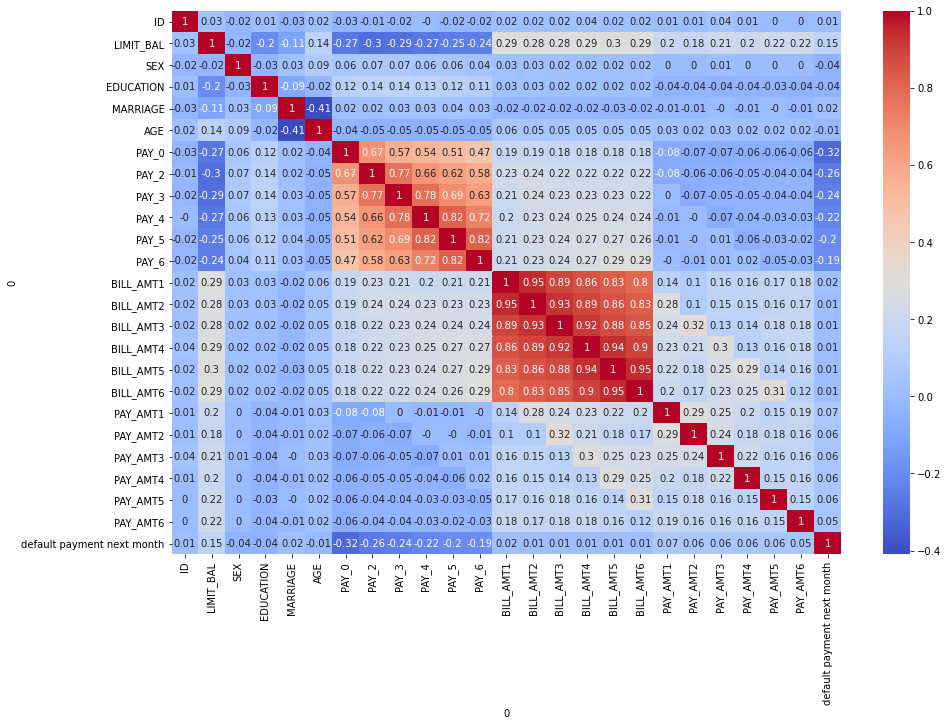

In [87]:
plt.figure(figsize = (15,10))
sns.heatmap(df_lbl_encode.corr().round(2), annot = True, cmap = 'coolwarm')

In [88]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

<AxesSubplot:xlabel='0', ylabel='0'>

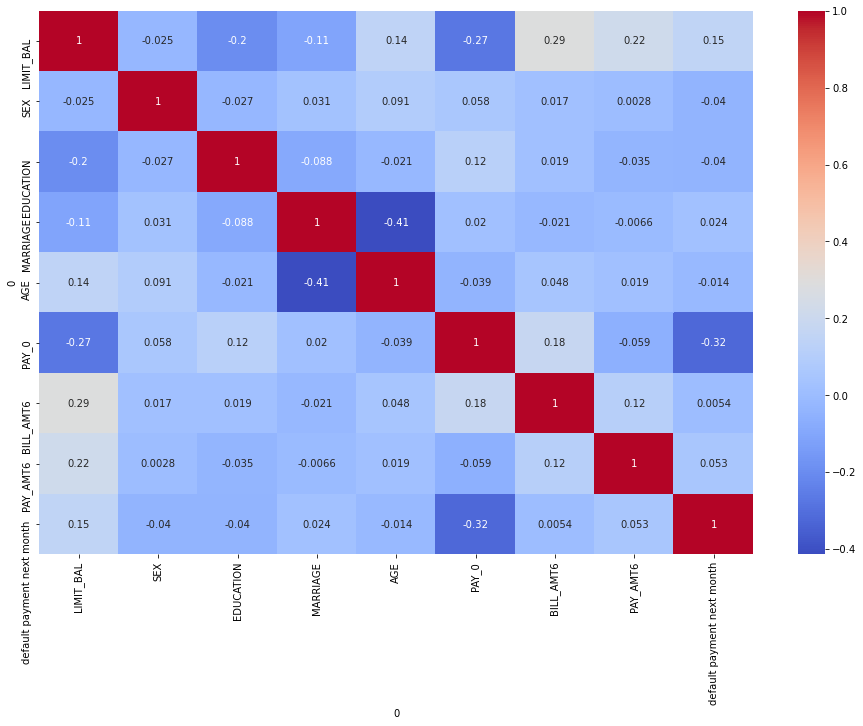

In [89]:
#Feature selection based on correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df_lbl_encode[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 
        'BILL_AMT6', 'PAY_AMT6', 'default payment next month']].corr(), annot = True, cmap = 'coolwarm')

# Covariance

In [90]:
covMat = df_lbl_encode.cov()
print(covMat)

0                                     ID     LIMIT_BAL          SEX  \
0                                                                     
ID                          7.500250e+07  2.941664e+07   -78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10 -1571.050630   
SEX                        -7.835638e+01 -1.571051e+03     0.239247   
EDUCATION                   1.691038e+02 -3.493060e+04    -0.018208   
MARRIAGE                   -1.314525e+02 -7.323670e+03     0.008014   
AGE                         1.491057e+03  1.730767e+05     0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04     0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04     0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04     0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04     0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04     0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04     0.024754   
BILL_A

In [91]:
covMatt = df_lbl_encode[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 
        'BILL_AMT6', 'PAY_AMT6', 'default payment next month']].cov()
print(covMatt)

0                              LIMIT_BAL          SEX     EDUCATION  \
0                                                                     
LIMIT_BAL                   1.683446e+10 -1571.050630 -34930.604407   
SEX                        -1.571051e+03     0.239247     -0.018208   
EDUCATION                  -3.493060e+04    -0.018208      1.881439   
MARRIAGE                   -7.323670e+03     0.008014     -0.062974   
AGE                         1.730767e+05     0.409726     -0.261453   
PAY_0                      -3.954593e+04     0.031685      0.184394   
BILL_AMT6                   2.243837e+09   487.430160   1556.428952   
PAY_AMT6                    5.065153e+08    24.051885   -857.397465   
default payment next month  8.267552e+03    -0.008113     -0.022934   

0                              MARRIAGE            AGE         PAY_0  \
0                                                                      
LIMIT_BAL                  -7323.669658  173076.722569 -39545.930009   
SE

In [92]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [93]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

# Comparison
Default status based on Sex, Education, Marital status (1 = married; 2 = single; 3 = divorce; 0=others)

In [94]:
feature = ['SEX', 'EDUCATION', 'MARRIAGE']

In [95]:
list(enumerate(feature))

[(0, 'SEX'), (1, 'EDUCATION'), (2, 'MARRIAGE')]

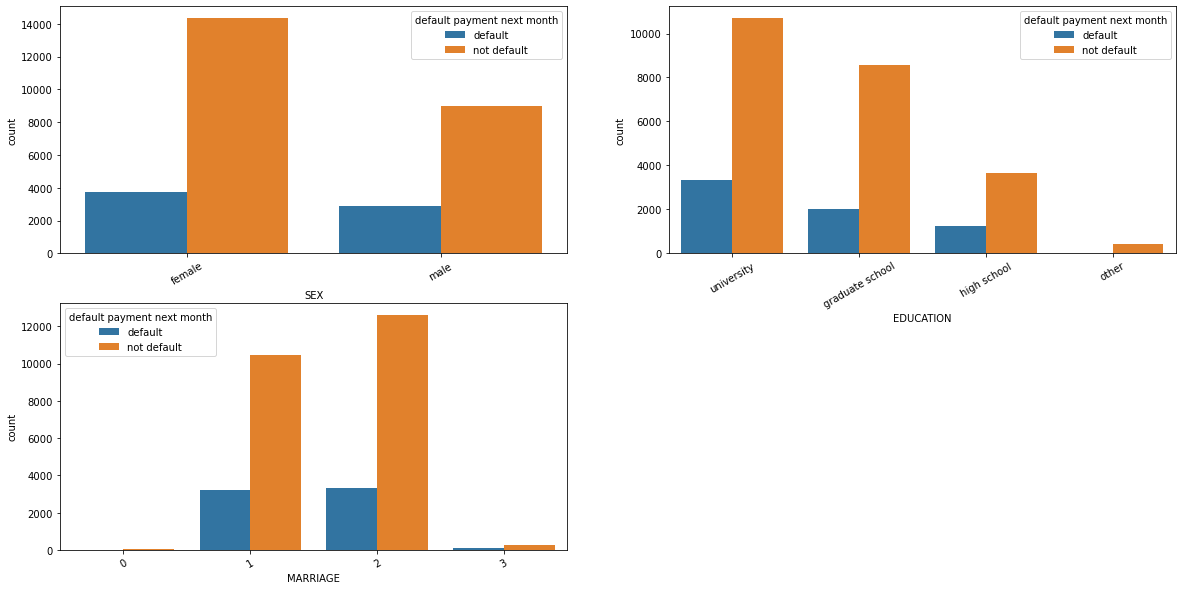

In [96]:
plt.figure(figsize = (20, 10))
for i in enumerate(feature):
    plt.subplot(2,2, i[0] + 1)
    sns.countplot(x = i[1], hue = 'default payment next month', data = credit)
    plt.xticks(rotation = 30)

In [97]:
default = df_lbl_encode[df_lbl_encode['X']==0]

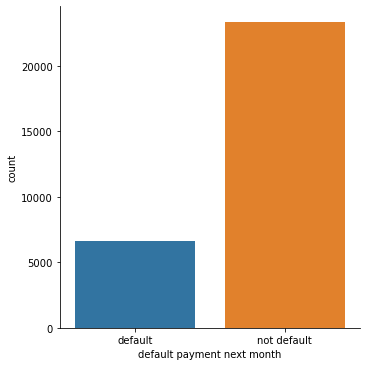

In [98]:
#Plot of those who defaulted vs those who did not
sns.catplot(x='XC', data=credit, kind='count')

In [99]:
#Total number of customers who defaulted
len(default)

6636

In [120]:
df_lbl_encode['default payment next month'].value_counts()

1    23364
0     6636
Name: default payment next month, dtype: int64

Text(0.5, 0.98, 'Default status by Sex')

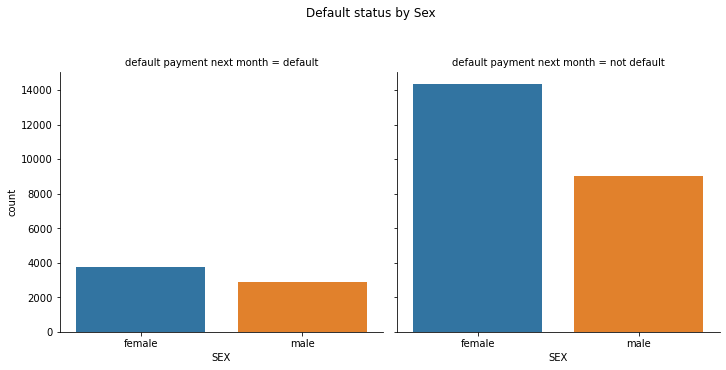

In [121]:
#Breakdown of defaults by Sex, Education, Marriage, Age, Limit balance
t = sns.catplot(x='SEX', data=credit, kind='count', col='default payment next month')
t.fig.subplots_adjust(top = .8)
t.fig.suptitle('Default status by Sex')

Text(0.5, 0.98, 'Default status by Education')

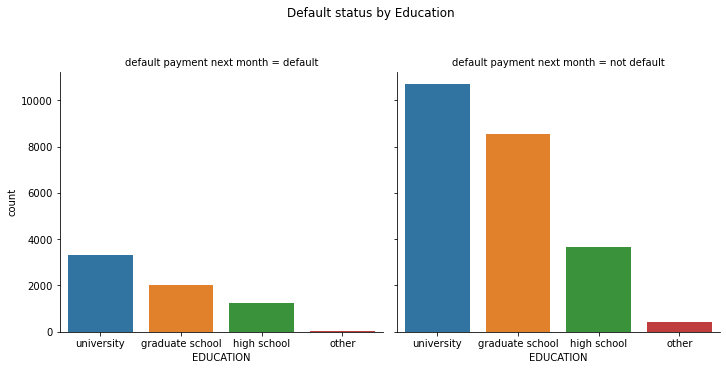

In [122]:
u = sns.catplot(x='EDUCATION', data=credit, kind='count', col='default payment next month')
u.fig.subplots_adjust(top = .8)
u.fig.suptitle('Default status by Education')

Text(0.5, 0.98, 'Default status by Marriage')

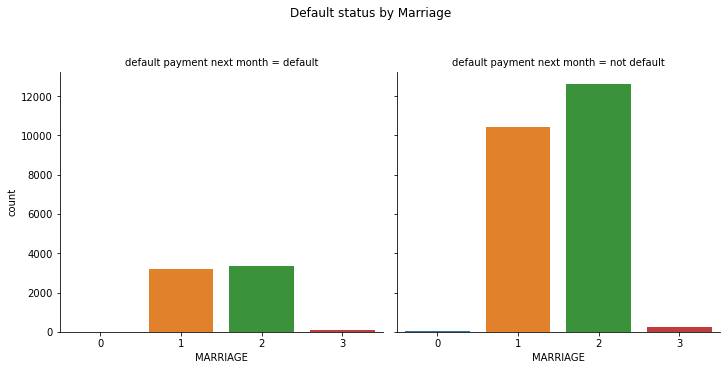

In [123]:
m = sns.catplot(x='MARRIAGE', data=credit, kind='count', col='default payment next month')
m.fig.subplots_adjust(top = .8)
m.fig.suptitle('Default status by Marriage')

Text(0.5, 0.98, 'Default status by Age')

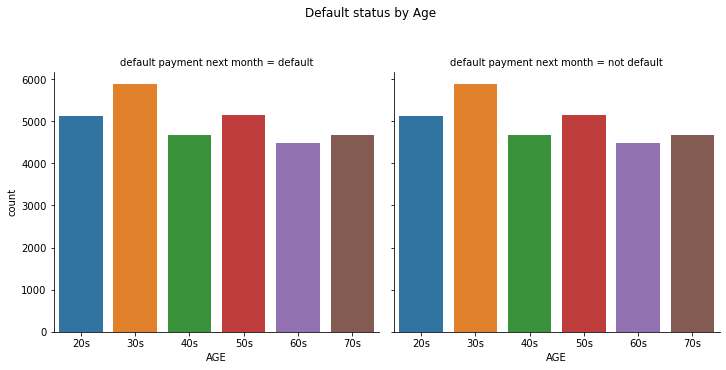

In [124]:
v = sns.catplot(x=prage, data=credit, kind='count', col='default payment next month')
v.fig.subplots_adjust(top = .8)
v.fig.suptitle('Default status by Age')

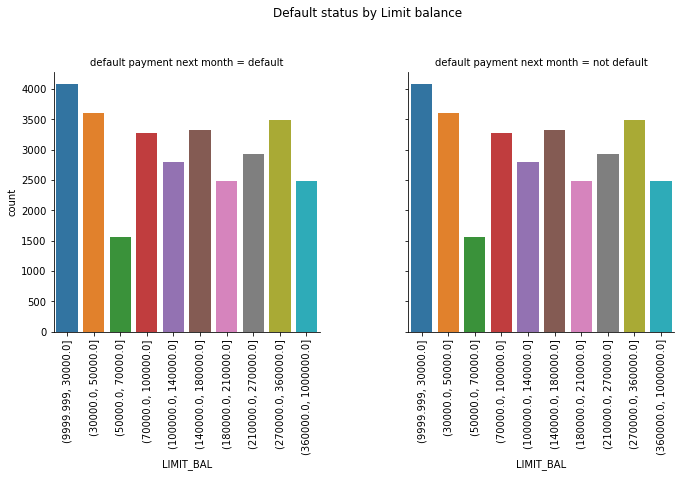

In [125]:
b = sns.catplot(x=disc_bal, data=credit, kind='count', col='default payment next month')
b.fig.subplots_adjust(top = .8)
b.fig.suptitle('Default status by Limit balance')
b.set_xticklabels(rotation=90)